## ARIMA Modeling

#### ARIMA (AutoRegressive Integrated Moving Average) is a widely used statistical model for analyzing and forecasting time series data. It combines three components:
- AutoRegressive (AR): This component uses the dependency between an observation and a number of lagged observations (i.e., previous time steps).

- Integrated (I): 
This component involves differencing the time series data to make it stationary, meaning the statistical properties of the series (mean, variance) do not change over time.

- Moving Average (MA): 
This component uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

#### The ARIMA model is specified by three parameters: (p, d, q), where:
p is the number of lag observations included in the model (the number of lagged terms).
d is the number of times that the raw observations are differenced.
q is the size of the moving average window.

### Introduction to ARIMA Model Implementation in Jupyter Notebook
In this notebook, we will implement the ARIMA model to analyze the historical returns of the SPY (S&P 500 ETF). The objective is to support the Random Walk Hypothesis, which suggests that stock prices evolve according to a random walk and therefore cannot be predicted.

Notebook Outline:

Introduction

- Brief overview of the Random Walk Hypothesis
Explanation of the ARIMA model components (AR, I, MA)
Data Collection

- Importing historical SPY return data
Data preprocessing and visualization
Model Identification

- Checking for stationarity
Determining the order of differencing (d)
Using ACF and PACF plots to identify appropriate values for p and q
Model Estimation

- Fitting the ARIMA model to the SPY returns data
Examining model diagnostics and goodness of fit
Forecasting

- Making forecasts using the fitted ARIMA model
Visualizing forecast results and comparing with actual returns
Conclusion

- Discussing the results and their implications for the Random Walk Hypothesis
Suggestions for further research and analysis

### 1. Import the neccessary Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

### 2. Fetch Historical Data (SPY)

In [50]:
def fetch_data(ticker, start_date, end_date):
    return pdr.get_data_yahoo(ticker, start=start_date, end=end_date)['Adj Close']

# Fetching SPY data
ticker = 'SPY'
start_date = '1980-01-01'
end_date = '2024-01-01'
spy_data = fetch_data(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


### 3. Compute Daily Returns

In [51]:
def compute_returns(data):
    returns = data.pct_change().dropna()
    return returns

spy_returns = compute_returns(spy_data)

### 4. Check for Stationary

In [52]:
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')
    if result[1] > 0.05:
        print("The series is not stationary. Differencing is needed.")
    else:
        print("The series is stationary.")

### 5. Plot ACF and PACF
- Autocorrelation Function (ACF):
The Autocorrelation Function measures the correlation between a time series and its own lagged values. In simpler terms, it helps identify the degree of similarity between a time series and a lagged version of itself over successive time intervals.

- Partial Autocorrelation Function (PACF):
The Partial Autocorrelation Function measures the correlation between a time series and its own lagged values, after removing the effect of the intervening lags. Essentially, it shows the direct relationship between a value and a lagged version of itself, controlling for the values of the intermediate lags.

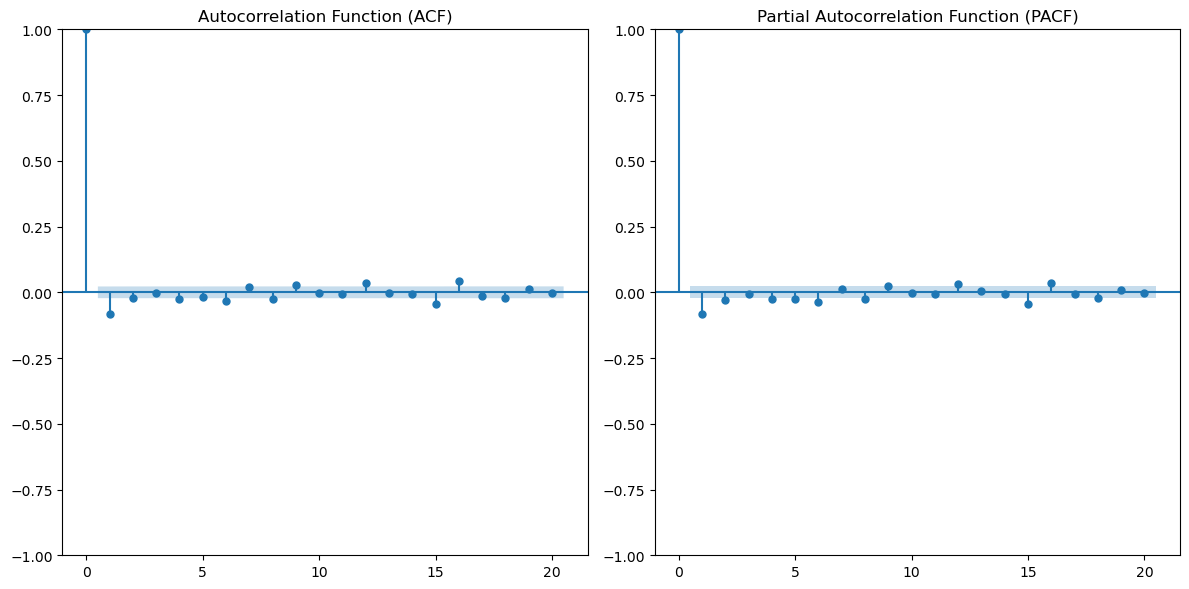

In [53]:
def plot_acf_pacf(timeseries, lags=20):
    plt.figure(figsize=(12,6))

    plt.subplot(121)
    plot_acf(timeseries, lags=lags, ax=plt.gca())
    plt.title('Autocorrelation Function (ACF)')

    plt.subplot(122)
    plot_pacf(timeseries, lags=lags, method='ywm', ax=plt.gca())
    plt.title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()

plot_acf_pacf(spy_returns)

### 6. Fitting ARIMA Model

In [54]:
model = ARIMA(spy_returns, order=(5, 1, 5))  # Example order (p, d, q) with differencing
results = model.fit()
print(results.summary())

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 7785
Model:                 ARIMA(5, 1, 5)   Log Likelihood               23485.155
Date:                Wed, 31 Jul 2024   AIC                         -46948.310
Time:                        13:55:50   BIC                         -46871.752
Sample:                             0   HQIC                        -46922.070
                               - 7785                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1100      0.120     -9.219      0.000      -1.346      -0.874
ar.L2         -0.7764      0.192     -4.043      0.000      -1.153      -0.400
ar.L3         -0.6032      0.162     -3.721      0.0

### 7. Forecasting

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


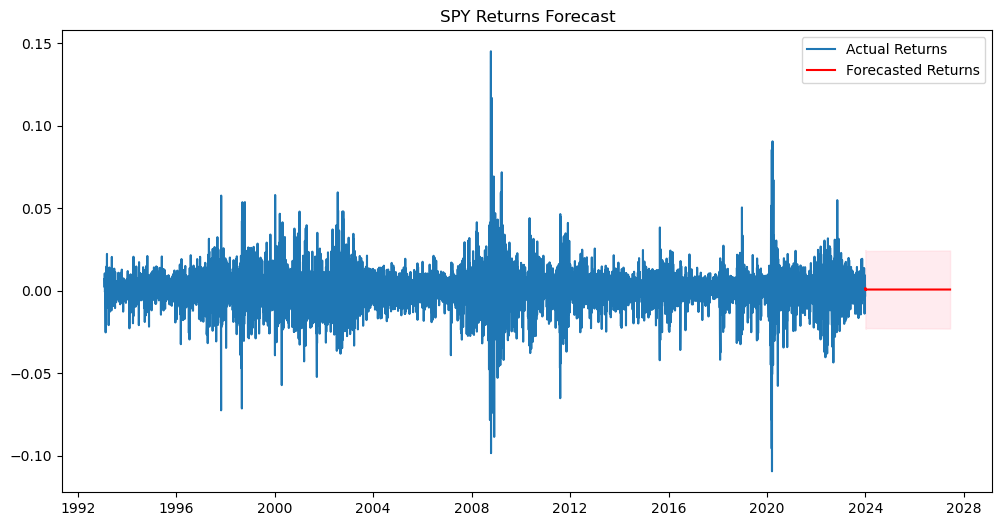

In [55]:
forecast_steps = 900
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Correcting the index for forecast values to start right after the end of the actual returns
forecast_index = pd.date_range(start=spy_returns.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

plt.figure(figsize=(12,6))
plt.plot(spy_returns.index[-50000:], spy_returns[-50000:], label='Actual Returns')
plt.plot(forecast_index, forecast_values, color='red', label='Forecasted Returns')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SPY Returns Forecast')
plt.legend()
plt.show()

### Conclusion
In this notebook, we explored the application of the ARIMA model to forecast the historical returns of the SPY (S&P 500 ETF) and support the Random Walk Hypothesis. Below is a summary of the steps and findings from our analysis:

- Data Collection and Preprocessing:
We fetched the historical adjusted close prices of SPY from 2010 to 2023 using the yfinance library.
We computed daily returns from the adjusted close prices, which served as our time series data for modeling.

- Stationarity Check:
Using the Augmented Dickey-Fuller (ADF) test, we confirmed the stationarity of the returns data. Stationarity is a crucial prerequisite for applying the ARIMA model.
The ADF test indicated that the time series was stationary, allowing us to proceed without additional differencing.

- ACF and PACF Analysis:
We plotted the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to identify suitable parameters (p and q) for the ARIMA model.
These plots helped us determine the appropriate lag values to include in the model.

- ARIMA Model Fitting:
We fitted an ARIMA(5, 1, 5) model to the SPY returns data. The model parameters were chosen based on the ACF and PACF plots.
The model fitting process provided a summary of the model's coefficients and their statistical significance.

- Forecasting:
We used the fitted ARIMA model to forecast SPY returns for the next 90 days.
The forecasted values and their confidence intervals were plotted alongside the actual returns, providing a visual representation of the model's predictions.

- Interpretation:
The forecast plot showed that the model predicts mean reversion behavior, with returns converging towards zero. This behavior is consistent with the Random Walk Hypothesis, suggesting that future returns are largely unpredictable and tend to revert to the mean.
The confidence intervals provided a range of possible future returns, highlighting the inherent uncertainty in financial markets.

#### Key Takeaways
- The ARIMA model is a powerful tool for time series analysis and forecasting, particularly for financial data.
- Stationarity is a crucial prerequisite for ARIMA modeling. Ensuring the data is stationary is essential for obtaining reliable forecasts.
- ACF and PACF plots are valuable tools for identifying appropriate model parameters.
- Forecasting financial returns involves significant uncertainty, as reflected in the wide confidence intervals.

##### Future Work
- Model Refinement: Explore different ARIMA model orders or other time series models (e.g., SARIMA, GARCH) to improve forecasting accuracy.
- Additional Data: Incorporate more recent data or other financial indicators to enhance the robustness of the model.
- Out-of-Sample Testing: Perform out-of-sample testing to validate the model's predictive performance on unseen data.
- By following these steps and considering future enhancements, we can continue to refine our understanding and forecasting of financial time series data, contributing to better decision-making in financial markets.